In [17]:
from sklearn.datasets import make_blobs

In [19]:
X, y = make_blobs(n_samples=50, centers =2, random_state=0, cluster_std=0.60)

### n_samples-> rows in the dataset
### centres-> gives us no of clusters  i.e if 2->0,1 ; 3->0,1,2
### n_feature-> no of columns
### random_state-> generates random state which is fixed for that number
### cluster_std-> std of the data

In [21]:
# import pandas  as pd
# pd.DataFrame(X)

In [23]:
print(y)
y.shape

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


(50,)

In [25]:
print(X)
X.shape

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

(50, 2)

In [27]:
## we  have features and targets here

### A kernel is a function that maps data points into a higher-dimensional space without explicitly computing the coordinates in that space. This allows SVM to work efficiently with non-linear data by implicitly performing the mapping. For example consider data points that are not linearly separable. By applying a kernel function SVM transforms the data points into a higher-dimensional space where they become linearly separable.

Linear Kernel: For linear separability.
Polynomial Kernel: Maps data into a polynomial space.
Radial Basis Function (RBF) Kernel: Transforms data into a space based on distances between data points.

### C
C is used for margin boundary
### High C 
High C value result in less support vectors ie we consider small number of points/values for classification

### Low C 
Low C value result in more support vectors ie we consider large number of points/values for classification

## Another meaning
High C means less margin width
Low C means high margin width

In [31]:
from sklearn.svm import SVC ### "Support vector classifier"
model = SVC(kernel ='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [33]:
print(model)

SVC(C=10000000000.0, kernel='linear')


### For better visualization
we create a convenience function thyat will plot SVM decision boundary for us

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svc(model, ax=None):
    """Plots the decision boundary, margins, and support vectors of an SVC."""
    if ax is None:
        ax=plt.gca()

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    # Create a grid of points to evaluate the decision function
    x= np.linspace(x_lim[0], x_lim[1], 30)
    y= np.linspace(y_lim[0], y_lim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # Calculate the decision function for each point in the grid
    decision_func = model.decision_function(xy).reshape(X.shape)

    # Plot the decision boundary and margins
    ax.contour(X, Y, decision_func, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-','--'])

    #Plot the support vectors 
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:,-1],
              s=300, linewidth=1, facecolors='none', edgecolors='k')
    # Added edge color for better visibility
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    matplotlib.pyplot.close()


# Example usage (assuming you have X, y, and a trained model):
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc(model)
plt.show()
plt.close()

### Understanding legend

In [39]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

# # Plotting two lines
# line1, = ax.plot([0, 1, 2], [0, 1, 4], color='blue')
# line2, = ax.plot([0, 1, 2], [0, 2, 3], color='green')

# # Creating custom labels
# handles = [line1, line2]
# labels = ['Line A', 'Line B']

# # Adding legend at upper left
# ax.legend(handles, labels, loc='best')

# plt.title("Custom Legend Example")
# plt.show()


#These key data points, which are crucial for determining the optimal dividing line, are called support vectors. They're so important that they give the Support Vector Machine algorithm its name. In scikit-learn, you can access these support vectors through the support_vectors_ attribute of the trained classifier object.



In [43]:
model.support_vectors_



array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

2.0 Flash Experimental. Might not work as expected.

The power of this classifier lies in the fact that only the support vectors—the points closest to the margin—influence the model's fit. Points further away on the correct side of the margin don't affect the position of the dividing line at all.

This happens because these distant points don't play a role in the calculation (loss function) the model uses to find the best fit. Their exact location and number are irrelevant as long as they stay on the correct side of the margin.

To illustrate this, we can compare the models created using only the first 60 data points and then using the first 120 data points of the dataset.



In [46]:
def plot_svm(N=10, ax=None):
    """ PLots an SVM model with N data points."""
    # Generate sample data with two clusters
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

    # Select the first N data points
    X = X[:N]
    y =  y[:N]

    # Create and train an SVM model with linear kernel and high C
    model = SVC(kernel='linear', C=1E10)
    model.fit(X,y)

    # GEt or create an axes object for plotting
    ax = ax or plt.gca()

    # plot the data points with color based on class
    ax.scatter(X[: ,0], X[:, 1], c=y, s=50, cmap='autumn')

    #Set plot limits
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)

    #Plotn the decision boundary, margins, and suppport vectors
    plot_svc(model, ax)

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(16,6))

    # Adjust spacing between subplots
    fig.subplots_adjust(left=0.0625, right =0.95, wspace=0.1)

    #Generate plots for N =60 and N = 120 data points
    for axi, N in zip(ax, [60, 120]):
        plot_svm(N, axi)
        axi.set_title('N = {0}'.format(N))
    matplotlib.pyplot.close()

RecursionError: maximum recursion depth exceeded

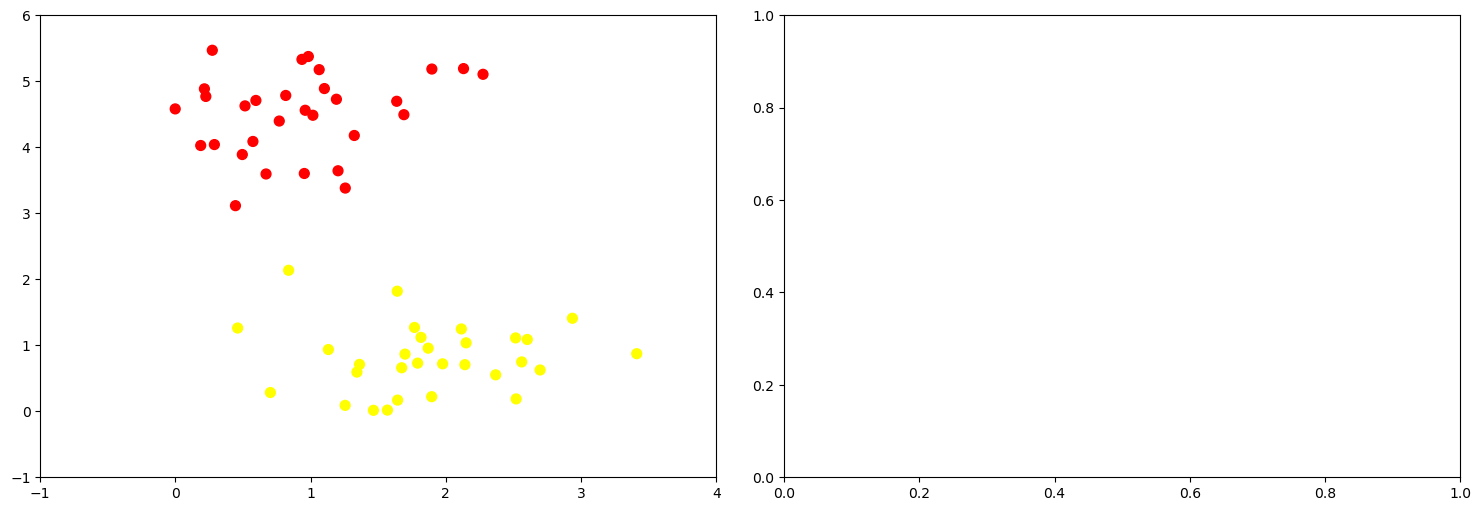

In [48]:
k =plot_svm()


In [ ]:
plt.close('all')

In [66]:
# def plot_svm(N=10, ax=None):
#   """
#   Plots an SVM model with N data points.
#   """
#   # Generate sample data with two clusters
#   # X, y = mak_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

#   # Select the first N data points
#   X = X[:N]
#   y = y[:N]

#   # Create and train an SVM model with linear kernel and high C
#   model = SVC(kernel='linear', C=1E10)
#   model.fit(X, y)

#   # Get or create an axes object for plotting
#   ax = ax or plt.gca()

#   # Plot the data points with color based on class
#   ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#   # Set plot limits
#   ax.set_xlim(-1, 4)
#   ax.set_ylim(-1, 6)

#   # Plot the decision boundary, margins, and support vectors
#   plot_svc_decision_function(model, ax)

# # Create a figure with two subplots
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# # Adjust spacing between subplots
# fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# # Generate plots for N=60 and N=120 data points
# for axi, N in zip(ax, [60, 120]):
#   plot_svm(N, axi)
#   axi.set_title('N = {0}'.format(N))

In [1]:

import matplotlib.pyplot